In [1]:
# install.packages("rlang")
suppressMessages(library(tidyverse))
suppressMessages(library(odbc))


In [2]:
con2 = dbConnect(odbc::odbc(), Driver = "SQL Server", Server = "analyticslab.database.windows.net", 
    Port = "1433", Database = "Accounting", UID = "Student", 
    PWD = "Acct7397")

In [3]:
Advertising <-  dbGetQuery(con2,"
SELECT 
                           [TV]
                           ,[Radio]
                           ,[Sales]
                           FROM [dbo].[Advertising]
                           ")

mFit <- lm(Sales ~ TV + Radio, data = Advertising)
mFit$coefficients
Advertising$yhat <- predict(mFit, Advertising)


(Intercept)          TV       Radio 
 2.92109991  0.04575482  0.18799423

(Intercept)          TV       Radio 
 2.92109991  0.04575482  0.18799423

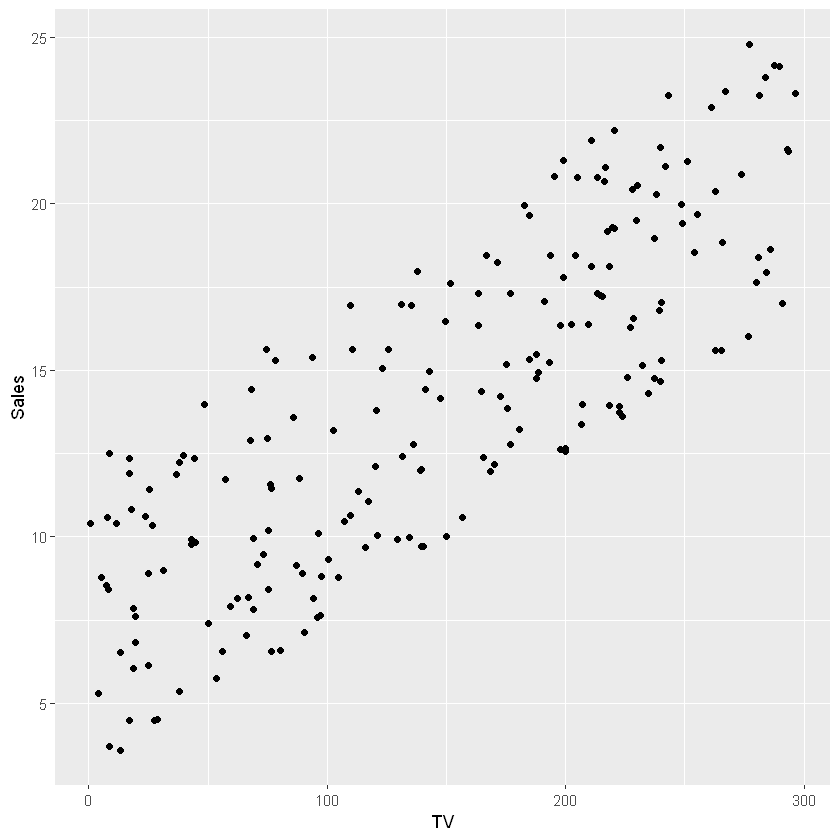

In [4]:
mFit <- lm(Sales ~ TV + Radio, data = Advertising)
mFit$coefficients
Advertising$yhat <- predict(mFit, Advertising)


p = ggplot (aes(x = TV, y = Sales), data = Advertising) + 
  geom_point(aes(x = TV, y = yhat))
p

,Sales
1,2.92109991
TV,0.04575482
Radio,0.18799423


'data.frame':	200 obs. of  4 variables:
 $ TV   : num  230 200 135 222 296 ...
 $ Radio: num  37.8 2.6 41.7 4.3 36.3 10.1 17.2 34.3 46.4 11 ...
 $ Sales: num  22.1 10.6 17.2 11.7 23.8 14.8 14.7 20.7 19.2 7.2 ...
 $ yhat : num  20.6 12.6 16.9 13.9 23.3 ...


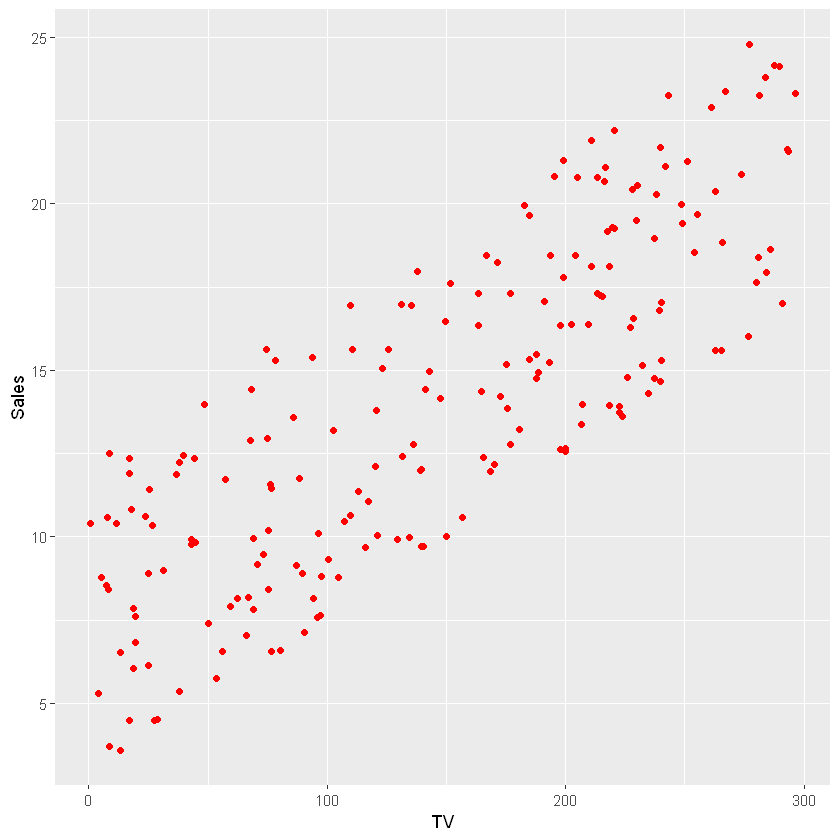

In [5]:
# Normal Equations Solution - refer to Python file and Slides

vY <- as.matrix(dplyr::select(Advertising, Sales)) # set up y values in matrix                        
mX <- as.matrix(cbind(1, dplyr::select(Advertising, TV, Radio))) # set up x values in matrix
vBeta <- solve(t(mX)%*%mX, t(mX)%*%vY) # solve using normal equations                    
vBeta

str(Advertising)
# Predictions using normal equations

vBeta2 <- as.numeric(vBeta)
Advertising$neY <- t(vBeta2%*%t(mX)) # 3 columns on left * 3 rows on right (after transpose)
# transpose different than pyhon bc lm stores coef in vector vs hoz array

# compare predictions using NE vs lm - should be the same

p = p + 
  geom_point(aes(x = TV, y = neY), data = Advertising, color = "red")
p


In [ ]:
#################### CHAnGE TO PLOTLY ######################